In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as splt
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import linregress


In [2]:
data_source_original= pd.read_csv("datasources/athlete_events.csv")
data_source_beta=data_source_original.copy()
data_source_original.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# load dataset


# Cleaning the dataset by replacing na with 0 in "Medal" and dropping the rest of the Na in Height & Weight

In [3]:
#data_source.dropna(inplace=True)
data_source_original["Medal"]=data_source_original["Medal"].fillna("0")
data_source_original["Medal"].dropna(inplace=True)
data_source_original.head()



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0


# Data Visualization

In [4]:
Gendercount=data_source_original["Sex"].value_counts()
Gendercount

M    196594
F     74522
Name: Sex, dtype: int64

In [5]:
Athletescount=len(data_source_original)
Athletescount

271116

In [6]:
Athletescount_df=pd.DataFrame({"Total Athletes":[Athletescount]})
Athletescount_df

,Total Athletes
0,271116


In [7]:
Gendercountpercentage=round(Gendercount/Athletescount*100,2)
Gendercountpercentage

M    72.51
F    27.49
Name: Sex, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

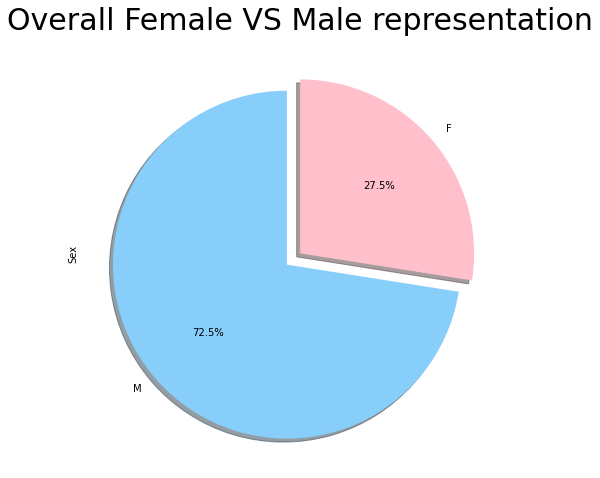

In [8]:
explode = (0.1, 0)
colors= ['lightskyblue','pink']
data_source_original.Sex.value_counts().plot(kind=("pie"),autopct='%1.1f%%', explode=explode,colors=colors,startangle=90,shadow=True, figsize=(12,8))
splt.title("Overall Female VS Male representation", fontsize=30)
splt.savefig('overall female vs male representation.png')
splt.show

# Average age per sport

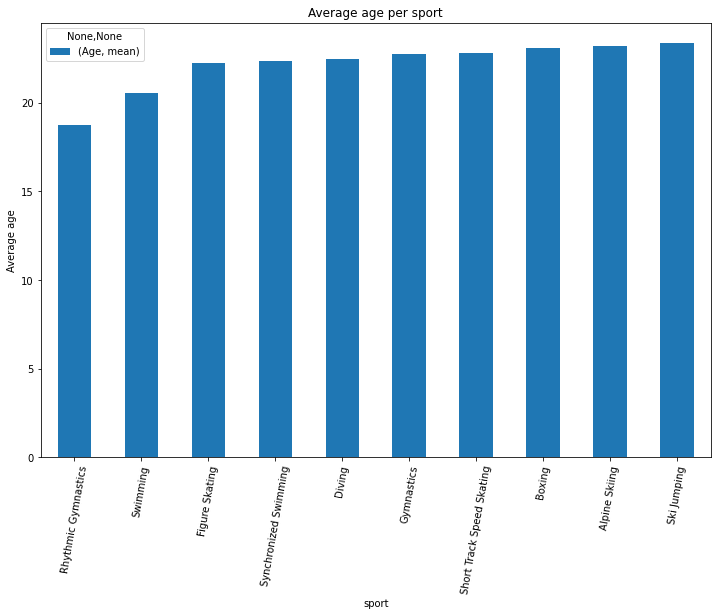

In [33]:
avg_age_per_sport=data_source_original.groupby(["Sport"]).agg({"Age":["mean"]}).sort_values(by=[('Age', 'mean')],ascending=True)
avg_age_per_sport.head(10).plot(kind="bar",figsize=(12,8))
splt.xticks(rotation=80)
splt.title("Average age per sport")
splt.xlabel("sport")
splt.ylabel("Average age")
#avg_age_per_sport
splt.savefig('Top 10 Youngest average age.png')
splt.show()

# Top 5 countries with the highest number of teams throughout olympic history

In [10]:
# explode=(0.1, 0.1, 0.1, 0.1, 0)
# colors= ['red','blue','black','green','orange']
Top_five=data_source_original.Team.value_counts()
# Top_five.head().plot(kind='pie',colors=colors,figsize=(12,8),explode=explode,shadow=True)
# splt.title('Total number of teams by countries ')
Top_five.head()

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: Team, dtype: int64

# Athletes with the highest number of medals

In [11]:
data_source_beta.dropna(inplace=True)
data_source_beta

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271078,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze


In [12]:
Count_basedonmedals=data_source_beta.groupby(["Medal","Name"]).count()
Count_basedonmedals
# Topwinners_df=data_source_original[["Medal","Name"]]
# Medal_count=pd.get_dummies(Topwinners_df["Medal"])
# Final_medal_count=pd.DataFrame({"Name":data_source_original["Name"],
#              "Bronze":Medal_count["Bronze"],
#              "Silver":Medal_count["Silver"],
#              "Gold":Medal_count["Gold"]})

# Final_medal_count


ID  Sex  Age  Height  Weight  Team  NOC  Games  \
Medal  Name                                                                     
Bronze Aaron Brown              1    1    1       1       1     1    1      1   
       Aaron Egbele             1    1    1       1       1     1    1      1   
       Aaron Gate               1    1    1       1       1     1    1      1   
       Aaron John McIntosh      1    1    1       1       1     1    1      1   
       Aaron Russell            1    1    1       1       1     1    1      1   
...                            ..  ...  ...     ...     ...   ...  ...    ...   
Silver tienne Piquiral          1    1    1       1       1     1    1      1   
       udovt Cvetler            1    1    1       1       1     1    1      1   
       ukasz Zygmunt Pawowski   1    1    1       1       1     1    1      1   
       ura "urica" Bjedov       1    1    1       1       1     1    1      1   
       va Rakusz                1    1    1       1       1     1    1      1   

                               Year  Season  City  Sport  Event  
Medal  Name                                                      
Bronze Aaron Brown                1       1     1      1      1  
       Aaron Egbele               1       1     1      1      1  
       Aaron Gate                 1       1     1      1      1  
       Aaron John McIntosh        1       1     1      1      1  
       Aaron Russell              1       1     1      1      1  
...                             ...     ...   ...    ...    ...  
Silver tienne Piquiral            1       1     1      1      1  
       udovt Cvetler              1       1     1      1      1  
       ukasz Zygmunt Pawowski     1       1     1      1      1  
       ura "urica" Bjedov         1       1     1      1      1  
       va Rakusz                  1       1     1      1      1  

[25234 rows x 13 columns]

In [13]:
#data_source_original=data_source_original.dropna()
Count_basedonmedals=data_source_beta.groupby(["Name"]).count()["Medal"]
Count_basedonmedals.sort_values()

Name
A. Joshua "Josh" West                  1
Melanie Ainsworth Smith (-Taylor)      1
Melanie Hoffmann                       1
Melanie Kate Wilson                    1
Melanie Kok                            1
                                      ..
Ole Einar Bjrndalen                   13
Borys Anfiyanovych Shakhlin           13
Nikolay Yefimovich Andrianov          15
Larysa Semenivna Latynina (Diriy-)    18
Michael Fred Phelps, II               28
Name: Medal, Length: 20732, dtype: int64

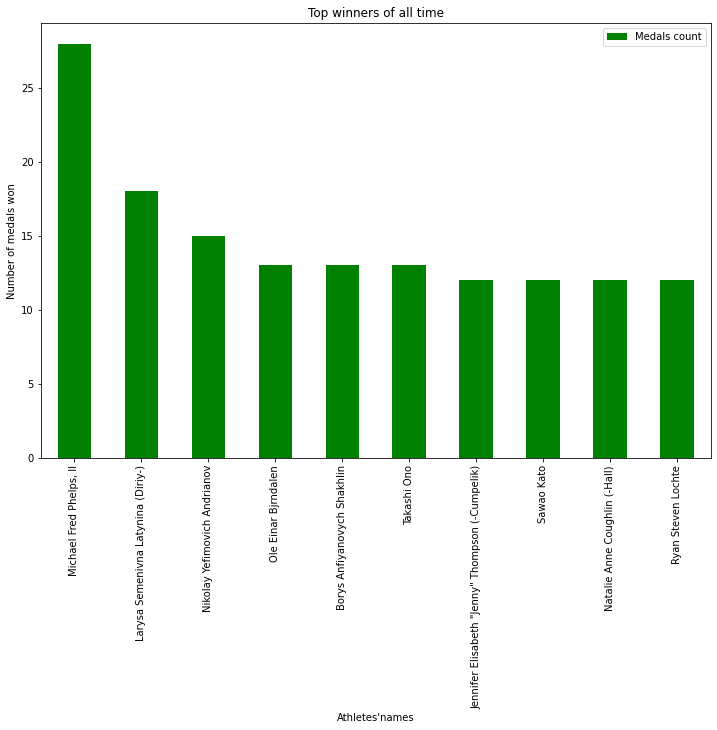

In [37]:
Topwinners_df=pd.DataFrame({"Medals count":Count_basedonmedals})
Topwinners_df=Topwinners_df.sort_values("Medals count", ascending=False)
Topwinners_df.head(10).plot(kind="bar", color="green",figsize=(12,8))
splt.title("Top winners of all time")
splt.xlabel("Athletes'names")
splt.ylabel("Number of medals won")
splt.savefig('Top winners.png')
splt.show()



# Height vs Weight Linear regression

In [15]:
x_values = data_source_beta['Weight']
y_values = data_source_beta['Height']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(regress_values)
print(line_eq)

40        184.207611
41        171.948599
42        171.948599
44        171.948599
48        171.948599
             ...    
271078    181.288799
271080    181.288799
271082    182.456324
271102    171.948599
271103    171.948599
Name: Weight, Length: 30181, dtype: float64
y = 0.58x +134.59


The r-value is: 0.642932671689282


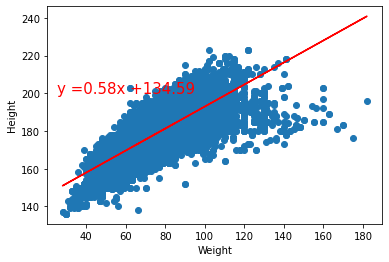

In [35]:
splt.scatter(x_values,y_values)
splt.plot(x_values,regress_values,"r-")

splt.xlabel('Weight')
splt.ylabel('Height')

print(f"The r-value is: {rvalue**2}")
splt.annotate("y =0.58x +134.59",(25,200),fontsize=15,color="red")

splt.savefig('regressionanalysis.png')
splt.show()

# Data info summary

In [31]:
Events_data=data_source_original[["Sport","Event"]]
Events_data=Events_data.drop_duplicates()
Events_data


,Sport,Event
0,Basketball,Basketball Men's Basketball
1,Judo,Judo Men's Extra-Lightweight
2,Football,Football Men's Football
3,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,Speed Skating,Speed Skating Women's 500 metres
...,...,...
128473,Weightlifting,Weightlifting Men's All-Around Dumbbell Contest
186911,Archery,"Archery Men's Au Chapelet, 33 metres"
186912,Archery,"Archery Men's Au Cordon Dore, 33 metres"
194996,Archery,"Archery Men's Target Archery, 28 metres, Indiv..."


In [20]:
host_country_df=data_source_original[["City","Year","Season"]]
host_country_df.drop_duplicates().reset_index().sort_values("Year")

,index,City,Year,Season
50,3079,Athina,1896,Summer
3,3,Paris,1900,Summer
44,711,St. Louis,1904,Summer
40,268,Athina,1906,Summer
46,1149,London,1908,Summer
13,35,Stockholm,1912,Summer
2,2,Antwerpen,1920,Summer
43,672,Chamonix,1924,Winter
14,39,Paris,1924,Summer
34,133,Amsterdam,1928,Summer


In [21]:
len(data_source_original)

271116

In [30]:
data_source_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [23]:
data_source_original.shape


(271116, 15)

In [29]:
data_source_original.isna().sum()

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

In [25]:
Uniqueitem=data_source_original.groupby(by=["Name","Year"]).sum()
Uniqueitem

ID    Age  Height  Weight
Name                                      Year                               
  Gabrielle Marie "Gabby" Adcock (White-) 2016     869   25.0   167.0     0.0
 Eleonora Margarida Josephina Scmitt      1948  215906   32.0     0.0     0.0
 Jean Hauptmanns                          1912   46661   26.0     0.0     0.0
 Luis ngel Fernando de los Santos Grossi  1948   26388   23.0     0.0     0.0
                                          1952  105552  108.0     0.0     0.0
...                                                ...    ...     ...     ...
zlem Kaya                                 2016   58232   26.0   165.0    47.0
zman Graud                                1972   40545   33.0   168.0    72.0
zzet Safer                                2016  104222   26.0   178.0    74.0
zzet nce                                  2004   52087   23.0   172.0    85.0
                                          2008   52087   27.0   172.0    85.0

[187237 rows x 4 columns]

In [26]:
Player_data=data_source_original[["ID","Sex","Age"]]
Player_data=Player_data.drop_duplicates()
Player_data

,ID,Sex,Age
0,1,M,24.0
1,2,M,23.0
2,3,M,24.0
3,4,M,34.0
4,5,F,21.0
...,...,...,...
271110,135568,F,33.0
271111,135569,M,29.0
271112,135570,M,27.0
271114,135571,M,30.0


In [32]:
data_source_original.corr()

,ID,Age,Height,Weight,Year
ID,1.000000,-0.003631,-0.011141,-0.009176,0.011885
Age,-0.003631,1.000000,0.138246,0.212069,-0.115137
Height,-0.011141,0.138246,1.000000,0.796213,0.047578
Weight,-0.009176,0.212069,0.796213,1.000000,0.019095
Year,0.011885,-0.115137,0.047578,0.019095,1.000000


In [28]:
data_source_original.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000
